<a href="https://colab.research.google.com/github/Behordeun/MY-PROJECTS/blob/master/Mock_exam_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source:
[https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking/version/3#](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking/version/3#)

>[Q1. Import the dataset using pandas](#scrollTo=Ls_LuSrBUFXg)

>[Q2. Bar plot](#scrollTo=6KnKbHp2CiWC)

>[Q3. Looking for a maximum](#scrollTo=zMOL87d6HEXo)

>[Q4. Data Manipulation and Plotting](#scrollTo=U1B_sw5foi4x)

>[Q5. Hypothesis testing](#scrollTo=91ijoJiSvjfh)

>[Q6. Confidence interval](#scrollTo=fSludxHa0LgJ)

>[Q7. Hypothesis testing](#scrollTo=G-ig1CXN0dQh)

>[Q8. Box Plot](#scrollTo=p258isB38min)

>[Q9. Box plot](#scrollTo=I9Cqb1DrAQU_)

>[Q10. Hypothesis Testing](#scrollTo=KoU7q4RfAdCv)

>[Q11. Hypothesis Testing](#scrollTo=DbKNMdIdrlYU)

>[Q12. Probability Distributions](#scrollTo=to_W8keae7Vy)

>[Q13. Probability Distributions](#scrollTo=Jk2id3wCEu5T)



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp
!pip install pingouin
import pingouin as pg
%matplotlib inline

     |████████████████████████████████| 215kB 2.7MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.1-cp36-none-any.whl size=211769 sha256=8ddc3b0a5530c80f99338fe654395a0ae1e53294029d614fc26545e5e2551620
  Stored in directory: /root/.cache/pip/wheels/d8/b8/43/e0d0c839adc9fbc291ff3b6af77417ff61b47bf256ea2ef03a
Successfully built pingouin


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


This dataset is a subset for 4 countries (France, code "fr", Germany, code "de", Italy, code "it", and Spain, code "es") of all the songs that have been Number 1 on Spotify in these countries, and their number of daily streams.

#Q1. Import the dataset using pandas

Import the dataset 'mockspotifyNr1.csv' using a `pandas` dataframe.

In [0]:
# Import the dataset mockspotifyNr1.csv
df=pd.read_csv('/content/drive/My Drive/Stats/Mock exam/mockspotifyNr1.csv')
df.head()



,Track Name,Artist,Streams,URL,Date,Region
0,One Dance,Drake,89403,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,fr
1,Mauvaise graine,Nekfeu,91971,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-02,fr
2,Mauvaise graine,Nekfeu,94563,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-03,fr
3,Mauvaise graine,Nekfeu,99606,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-04,fr
4,Mauvaise graine,Nekfeu,96563,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-05,fr


#Q2. Bar plot

Create a plot to visualize the total number of streams for each country.

In [0]:
counts = df.groupby('Region').Streams.sum()
counts


Region
de    171691565
es    120987911
fr     80285999
it     64884345
Name: Streams, dtype: int64

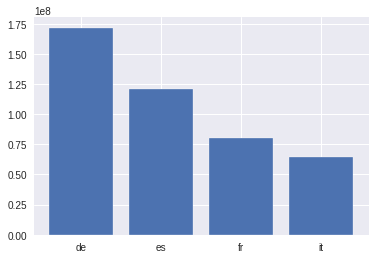

In [0]:
plt.bar(counts.index,counts);

#Q3. Looking for a maximum



Compute the total number of streams per artist. Identify which artist has the maximum number of streams in the dataset. 

In [0]:
counts2 = df.groupby(by='Artist').Streams.sum()
counts2

Artist
187 Strassenbande       4729324
Axwell /\ Ingrosso     16142515
Bad Bunny               4148530
Bausa                  48966901
Becky G                 9975082
Booba                   2879968
Camila Cabello           165951
Capo Plaza              1643220
Charlie Charles          221673
Clean Bandit            1778071
Coez                   12470178
DJ Khaled               2366133
Damso                  12315630
Danny Ocean              282658
Dark Polo Gang          2225547
Drake                     89403
Ed Sheeran             86004699
Fabio Rovazzi            131723
Francesco Gabbani       2329856
French Montana           609176
Gemitaiz                 945492
Ghali                   2661181
Gue Pequeno             1576926
Imagine Dragons          609603
J Balvin               22633156
J-AX                   10149558
Kalash                 20041844
Kay One                 4013225
Kollegah                 524131
Lacrim                   766747
Luis Fonsi            101864696
M

In [0]:
counts2.sort_values(ascending=False)


Artist
Luis Fonsi            101864696
Ed Sheeran             86004699
Bausa                  48966901
J Balvin               22633156
Kalash                 20041844
Niska                  18323509
Maluma                 17054614
Axwell /\ Ingrosso     16142515
Coez                   12470178
Damso                  12315630
J-AX                   10149558
Becky G                 9975082
Post Malone             6341166
Natti Natasha           5903095
187 Strassenbande       4729324
Bad Bunny               4148530
Kay One                 4013225
Shakira                 2957513
Booba                   2879968
Ghali                   2661181
Salmo                   2625707
Sfera Ebbasta           2381939
DJ Khaled               2366133
Francesco Gabbani       2329856
Dark Polo Gang          2225547
Ninho                   1994988
Clean Bandit            1778071
Capo Plaza              1643220
Gue Pequeno             1576926
Mariah Carey            1303370
Wham!                   1280932
M

Luis Fonsi

In [0]:
#alternative solution:
topArtist = counts2.idxmax()
topArtist


'Luis Fonsi'

The top artist in these four countries is Luis Fonsi.

#Q4. Data Manipulation and Plotting

Select only those that were number 1 in Spain (Region="es") and plot distribution of number of streams. Obtain some summary statistics. How many days are recorded?

In [0]:
dfES = df[df['Region']=='es']
dfES.head()




,Track Name,Artist,Streams,URL,Date,Region
1113,Chantaje,Shakira,189721,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,es
1114,Chantaje,Shakira,211834,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-02,es
1115,Chantaje,Shakira,212954,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-03,es
1116,Chantaje,Shakira,218958,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-04,es
1117,Chantaje,Shakira,235938,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-05,es


In [0]:
print("Total nr. of observations of #1 in Spain (nr. of different days) = ", len(dfES))
len(dfES)


Total nr. of observations of #1 in Spain (nr. of different days) =  371


371

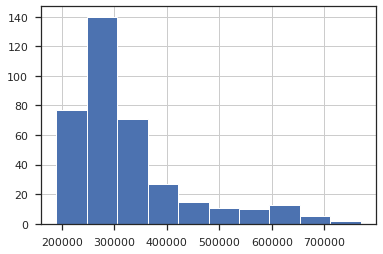

In [0]:
dfES['Streams'].hist(edgecolor="white", bins=10);

The distribution is unimodal, right-skewed, no outliers


In [0]:
dfES.describe()

,Streams
count,371.000000
mean,326112.967655
std,113771.923746
min,189721.000000
25%,255029.500000
50%,289244.000000
75%,350596.000000
max,769555.000000


#Q5. Hypothesis testing

Get the average number of streams of the entire dataset (only for #1 songs) and test whether there exists enough evidence to claim that the average number of streams in Spain for  #1 songs  is more than the average over the four countries (including Spain).

In [0]:
mean4countries = df['Streams'].mean()
print("Avg Streams of Nr. 1 Songs over the four countries = {0:.2f}, and I like {1}".format(mean4countries,topArtist))

Avg Streams of Nr. 1 Songs over the four countries = 295047.05, and I like Luis Fonsi


In [0]:
mean4countries = df['Streams'].mean()
mean4countries

295047.0485175202

In [0]:
meanES = dfES['Streams'].mean()
print("Spain Avg Streams of Nr. 1 Songs                   = {0:.2f}".format(meanES))

Spain Avg Streams of Nr. 1 Songs                   = 326112.97


In [0]:
meanES

326112.96765498654

We want to run the following test, using the Spanish subset:
$$
\begin{equation*}
\begin{cases}
H_0 : & \mu_{ES} \leq 295047\\
H_a : & \mu_{ES} > 295047
\end{cases}
\end{equation*}
$$

In [0]:
mu0 = mean4countries
res = smw.DescrStatsW(dfES['Streams'])
tStat, pVal, dfreedom = res.ttest_mean(value=mu0, alternative='larger')
print("Test Stat t        = {0:6.3f}".format(tStat))
print("p-value            = {0:6.3f}".format(pVal))
print("degrees of freedom = {0:6.0f}".format(dfreedom))

Test Stat t        =  5.259
p-value            =  0.000
degrees of freedom =    370


In [0]:
tStat, pVal, dfreedom

(5.259398288848054, 1.225397730393931e-07, 370.0)

Since the p-value is smaller than $\alpha$, we reject $H_0$: there is enough evidence to claim that the number of streams in Spain is higher than the average of the four countries.

#Q6. Confidence interval

Provide a 95% confidence interval for the average number of streams of nr. 1 songs in Spain. 

In [0]:
lower, upper = res.tconfint_mean()
lower,upper

(314497.9687772261, 337727.96653274697)

In [0]:
lower, upper = res.zconfint_mean()
lower,upper

(314535.96220453916, 337689.9731054339)

In [0]:
print("95% CI = [{0:6.1f}, {1:6.1f}]".format(lower, upper))

95% CI = [314498.0, 337728.0]


In [0]:
print("95% CI = [{0}, {1}]".format(lower, upper))

95% CI = [314497.9687772261, 337727.96653274697]


#Q7. Hypothesis testing

Are the average number of streams of nr 1 songs in Spain and France different?

$$
\begin{equation*}
\begin{cases}
H_0 : & \mu_{ES} = \mu_{FR}\\
H_1 : & \mu_{ES} \neq \mu_{FR}
\end{cases}
\end{equation*}
$$

In [0]:
dfFR = df[(df['Region']=='fr')]
len(dfFR),len(dfES)

(371, 371)

In [0]:
dfES['Streams'].mean(),np.round(dfES['Streams'].mean(),2)


(326112.96765498654, 326112.97)

In [0]:
dfFR['Streams'].mean(),np.round(dfFR['Streams'].mean(),2)

(216404.30997304583, 216404.31)

In [0]:
tStat, pVal, ddf = smw.ttest_ind(dfES['Streams'], dfFR['Streams'], alternative='two-sided')
tStat, pVal, ddf

NameError: ignored

We reject the null since the pvalue is 0 and it is below any significance level

In [0]:
# Alternatively using the function 'print'
dfFR = df[(df['Region']=='fr')]
print("Observations in 'fr' = ", len(dfFR))
print("Observations in 'es' = ", len(dfES))

print("Avg Streams # 1 songs :")
print("\t Spain   =", np.round(dfES['Streams'].mean(),2))
print("Observations in 'fr' = ", len(dfFR))
print("Observations in 'es' = ", len(dfES))
print("\t France  =", np.round(dfFR['Streams'].mean(),2))

tStat, pVal, ddf = smw.ttest_ind(dfES['Streams'], dfFR['Streams'], alternative='two-sided')
print("Test Stat t = {0:6.3f}".format(tStat))
print("p-value     = {0:6.3f}".format(pVal))
alpha=0.05
if pVal < alpha:
  print("Since p-value ({0:5.3f}) is less than alpha ({1:5.2f}), we reject H0: the two means are different".format(pVal, alpha))
else:
  print("Since p-value ({0:5.3f}) is greater than alpha ({1:5.2f}), we fail to reject H0: the means are not significantly different".format(pVal, alpha))


Observations in 'fr' =  371
Observations in 'es' =  371
Avg Streams # 1 songs :
	 Spain   = 326112.97
Observations in 'fr' =  371
Observations in 'es' =  371
	 France  = 216404.31
Test Stat t = 16.611
p-value     =  0.000
Since p-value (0.000) is less than alpha ( 0.05), we reject H0: the two means are different


#Q8. Box Plot

Create a boxplot to visualize the distribution of Streams over the two countries. What do you observe?

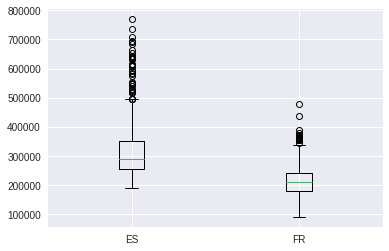

In [0]:
plt.boxplot([dfES['Streams'], dfFR['Streams']])
plt.xticks([1,2], ["ES", "FR"]);

We see that the values are lower for France, with less high outliers than in Spain.

#Q9. Box plot

Consider now the four regions, "es", "fr", "it", and "de" and the observations of nr. 1 songs. Create a boxplot to visually compare the distribution of streams of these four countries for #1 songs. What do you see?

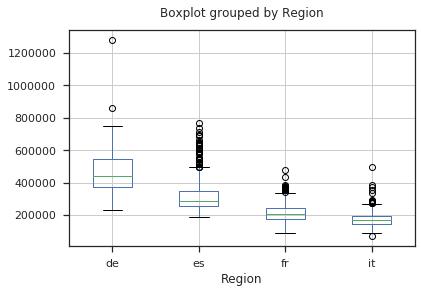

In [0]:
df.boxplot('Streams', by='Region')
plt.title('');

#Q10. Hypothesis Testing

Use the appropriate statistical technique to determine whether the average number of streams over the four countries differ. Check the assumptions required to use that technique. Clearly state your findings.

In [0]:
pg.homoscedasticity(data=df, dv='Streams', group='Region')

,W,pval,equal_var
levene,72.404,1.076461e-43,False


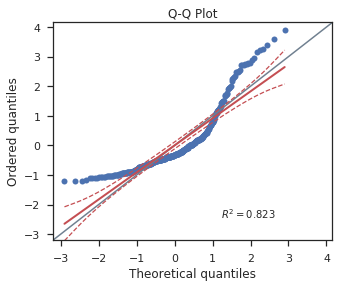

In [0]:
pg.qqplot(dfES['Streams']);

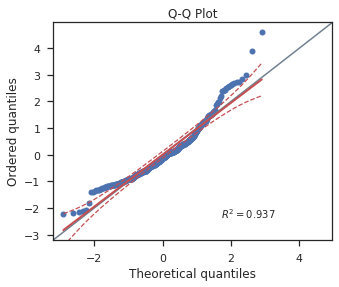

In [0]:
pg.qqplot(dfFR['Streams']);

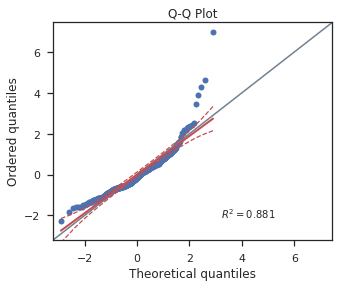

In [0]:
dfIT = df[df['Region']=='it']
pg.qqplot(dfIT['Streams']);

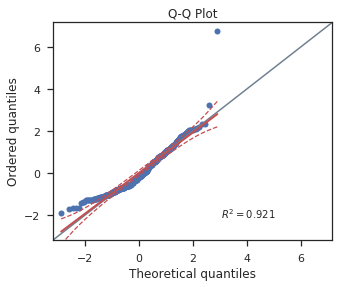

In [0]:
dfDE = df[df['Region']=='de']
pg.qqplot(dfDE['Streams']);

The assumptions of normality and homoscedasticity are not met. We proceed with the ANOVA nevertheless, but cannot trust the results too much.

In [0]:
df.anova(dv='Streams', between='Region')

,Source,ddof1,ddof2,F,p-unc,np2
0,Region,3,1480,743.712,8.621295e-295,0.601


Since the $p$-value is small, we reject the null hypothesis. At least one pair of means is different (we already knew it from Q7). We perform a post-hoc analysis to know which one.

In [0]:
pt=pg.pairwise_tukey(data=df, dv='Streams', between='Region')
pt

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,de,es,462780.499,326112.968,136667.531,6676.146,two-sided,20.471,0.001,1.502
1,de,fr,462780.499,216404.310,246376.189,6676.146,two-sided,36.904,0.001,2.707
2,de,it,462780.499,174890.418,287890.081,6676.146,two-sided,43.122,0.001,3.163
3,es,fr,326112.968,216404.310,109708.658,6676.146,two-sided,16.433,0.001,1.205
4,es,it,326112.968,174890.418,151222.550,6676.146,two-sided,22.651,0.001,1.661
5,fr,it,216404.310,174890.418,41513.892,6676.146,two-sided,6.218,0.001,0.456


The post-hoc analysis tells us that all the pairs of means are different. All the effect sizes are large, except for France-Italy (significant but small effect).

#Q11. Hypothesis Testing

Let us now assume that a song is labeled a "hit" if the artist is able to make a revenue of \$2500 or more in a single day. (Assume Spotify pays the artists \$0.006 per stream). Create a new column, taking a value of 1 for each "hit", and 0 otherwise. Next, determine whether there exists enough evidence to claim that the proportion of "hits" in Germany and Spain is different.

In [0]:
hitstreams=2500/0.006
df['hit'] = np.where(df['Streams']>hitstreams, 1, 0)
df.head()

,Track Name,Artist,Streams,URL,Date,Region,hit
0,One Dance,Drake,89403,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,fr,0
1,Mauvaise graine,Nekfeu,91971,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-02,fr,0
2,Mauvaise graine,Nekfeu,94563,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-03,fr,0
3,Mauvaise graine,Nekfeu,99606,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-04,fr,0
4,Mauvaise graine,Nekfeu,96563,https://open.spotify.com/track/4kKJ5CjwCtksszP...,2017-01-05,fr,0


In [0]:
#we run this code again to include the new variable
dfDE = df[df['Region']=='de']
dfDE.head()
dfES = df[df['Region']=='es']
dfDE.head()


,Track Name,Artist,Streams,URL,Date,Region,hit
742,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,229398,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,de,0
743,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,258441,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-02,de,0
744,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,251496,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-03,de,0
745,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,258747,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-04,de,0
746,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,260574,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-05,de,0


In [0]:
alpha=0.05
zStat, pVal=smp.proportions_ztest(count=(dfDE['hit'].sum(), dfES['hit'].sum()), nobs=(371, 371))

print('z       \t = {0:.3f}'.format(zStat))
print('p-value \t = {0:.3f}'.format(pVal))

if pVal < alpha:
  print("Reject H0: zStat = {0:5.3f}; p-value = {1:5.3f} vs alpha = {2}]".format(zStat, pVal, alpha))
else:
  print("Fail to Reject H0: zStat = {0:5.3f}; p-value = {1:5.3f} vs alpha = {2}]".format(zStat, pVal, alpha))


z       	 = 11.800
p-value 	 = 0.000
Reject H0: zStat = 11.800; p-value = 0.000 vs alpha = 0.05]


#Q12. Probability Distributions

Assume that the proportion of hits among Number 1 songs in Spain is consistently the same as what you observe in this sample. If we pick 6 songs randomly, what is the probability that at least 3 of them will be hits in Spain?

In [0]:
p=(dfES['hit'].sum()/dfES['hit'].count())
p
print("Probability of hit in Spain = {0:.3f}".format(p))
k = 2
n = 6
p3more = 1-ss.binom.cdf(k=k, n=n, p=p)
print('p (k at least 3) = 1- p(k={0} or less) = {1:.3f}'.format(k, p3more))


Probability of hit in Spain = 0.159
p (k at least 3) = 1- p(k=2 or less) = 0.055


# Q13. Probability Distributions

The GPA of students at a certain university follows a normal distribution with mean = 7 and stdev = 1.2:
1. What is the probability that a randomly selected student from that university has a GPA above 9?
2. Verify your computation above empirically. Randomly generate GPA for 5000 students under a normal distribution $N(\mu=7, \sigma=1.2)$. Verify, with a plot, that your population follows a normal distribution. Next, compute the percentage of students with GPA above 9 in the simulated population. Compare the answers.
3. What happens if we increase the population to 50000 students?

In [0]:
# Question 1
mu = 7
sigma = 1.2

x = 9
z = (x-mu)/sigma
prob = 1-ss.norm.cdf(z)
print("z score of GPA = {0} is {1:.3f}".format(x, z))
print("p(z > {0:.3f}) = {1:.4f}".format(z,prob))

z score of GPA = 9 is 1.667
p(z > 1.667) = 0.0478


Nr. of students with GPA above 9 = 246
%   of students with GPA above 9 = 0.0492


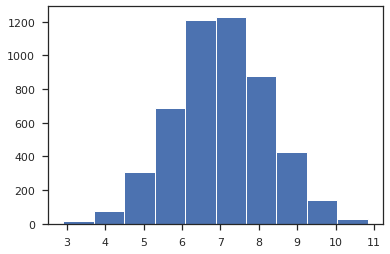

In [0]:
# Question 2
popSize = 5000
# generate random population
pop = ss.norm.rvs(loc=mu, scale=sigma, size= popSize)

# plot the population
plt.hist(pop, edgecolor="white")

# get students with GPA above threshold value
nAbove9 = len(pop[pop>x])
print("Nr. of students with GPA above {0} = {1}".format(x,nAbove9))
print("%   of students with GPA above {0} = {1:.4f}".format(x, nAbove9/len(pop)))

Nr. of students with GPA above 9 = 2331
%   of students with GPA above 9 = 0.0466


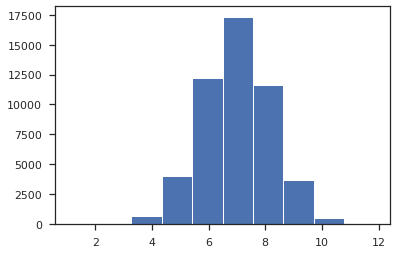

In [0]:
# Question 3: We would expect the estimate to become more precise.
popSize = 50000
# generate random population
pop = ss.norm.rvs(loc=mu, scale=sigma, size= popSize)

# plot the population
plt.hist(pop, edgecolor="white")

# get students with GPA above threshold value
nAbove9 = len(pop[pop>x])
print("Nr. of students with GPA above {0} = {1}".format(x,nAbove9))
print("%   of students with GPA above {0} = {1:.4f}".format(x, nAbove9/len(pop)))